In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import mutual_info_score

In [134]:
from scipy.spatial.distance import pdist, squareform
def VAT(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    C = [1,1]

    for r in range(2, N-1):
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])

    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)

    I.extend(J)
    C.extend(i)

    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    return RV.tolist(), C, I


def entropy(probs):
    
    return -probs.dot(np.log2(probs))


def mutual_info(df,bins):
    
    x = df.iloc[:,0].value_counts(normalized = True, sort = False)
    y = df.iloc[:,1].value_counts(normalized = True, sort = False)
    
    Hx = entropy(np.histogram2d(x,bins)[0])
    Hy = entropy(np.histogram2d(y,bins)[0])
    
    counts = df.groupby(list(df.columns.values)).size()
    probs = counts/ counts.values.sum()
    H_xy = entropy(probs)

    # Mutual Information
    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) #I_xy/np.sqrt(H_x*H_y)
    
    #return {'H_'+list(df)[0]:Hx,'H_'+list(df)[1]:Hy,'MI':MI,'NMI':NMI} 
    return MI

def cal_MI(x, y, bins):
    #calculate mutual information with bins
    c_xy = np.histogram2d(x,y,bins)[0]
    c_x = np.histogram(x,bins)[0]
    c_y = np.histogram(y,bins)[0]
    H_x = entropy2(c_x)
    H_y = entropy2(c_y)
    H_xy = entropy2(c_xy)
    MI = H_x + H_y - H_xy

    return MI

def entropy2(c):
    # calculating the entropy 
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))
    return H


In [135]:
food =  pd.read_csv("food_nutrient_2011_13_AHS.csv", header=0,low_memory=False)

In [136]:
##Question 1


###1a
# new dataframe df include all rows and columns from fourth to the end
df=pd.DataFrame(food.iloc[:,4:])
# change data type of df to float
df = df.astype(float)


###1b
# using standardscaler function to standarise the data 
# which have 0 mean and unit variance.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
foodscaled = np.matrix(scaled_data) 
###1c
# print the result within one decimal place.
print('***')
print('Q1.c: foodscaled matrix details')
print('Number of rows:',round(foodscaled.shape[0],1))
print('Number of columns:',round(foodscaled.shape[1],1))
print('Min:', round(foodscaled.min(),1))
print('Max:', round(foodscaled.max(),1))
print('Mean:', round(foodscaled.mean(),1))
print('Standard Deviation:',round(foodscaled.std(),1))
print('***')

***
Q1.c: foodscaled matrix details
Number of rows: 5740
Number of columns: 53
Min: -2.0
Max: 75.8
Mean: 0.0
Standard Deviation: 1.0
***


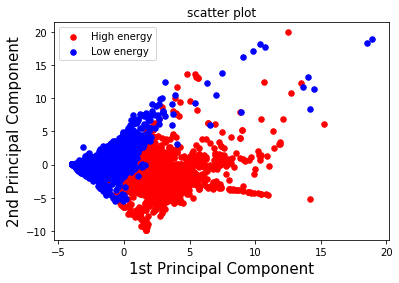

In [56]:
#Question 2


###2a
# select the Energ, with dietary fibre (kJ) with condition larger or smaller
# to 1000 to new column EnergyLevel.
food['EnergyLevel'] = np.where(food['Energy, with dietary fibre (kJ)']>1000, 1, 0)
# put all food['EnergyLevel'] value into lst_energy
lst_energy =[]
for i in food['EnergyLevel']:
    lst_energy.append(i)

###2b
#we want just the first two PCs
sklearn_pca = PCA(n_components=2)  
#doing machine learning
foodreduced =  sklearn_pca.fit_transform(foodscaled) 


###2c
# separate the value to high energy and low energy.
high_energy = []
for i in range(len(lst_energy)):
    if lst_energy[i] == 1:
        high_energy.append(i)

low_energy = []
for i in range(len(lst_energy)):
    if lst_energy[i] == 0:
        low_energy.append(i)
# plot the both two high and low energy into scatter diagram in red and blue
plt.scatter(foodreduced[:,0][high_energy],foodreduced[:,1][high_energy],s=30,c='red') 
plt.scatter(foodreduced[:,0][low_energy],foodreduced[:,1][low_energy],s=30,c='blue')
# add labels, title and legend on the diagram.
plt.xlabel('1st Principal Component', fontsize=15)
plt.ylabel('2nd Principal Component', fontsize=15)
plt.title('scatter plot')
plt.legend(['High energy', 'Low energy'])
plt.show()

Question 2d answer here

It shows a dataset of foodscaled which has less x and y value than original x and y.
Finding a new x and y axis and plot the result within new axises.
It will give a more directly diagram to see the features.

Advantage of PCA
reduce the number of features in the dataset
Improves Algorithm Performance
Removes Correlated Features

Disadvantages of PCA
Independent variables become less interpretable
Information Loss


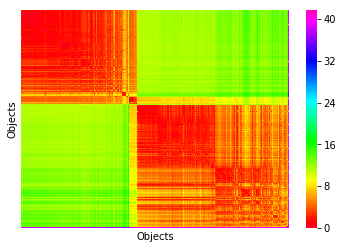

In [57]:
#Question 3


###3a
# change food["Survey ID"] to string type.
food['Survey ID']=food['Survey ID'].astype(str)
# convert foodscaled to dataframe
foodscaled = pd.DataFrame(foodscaled)
# add a column called Food category in foodscaled which takes value of 
# first digit of food['Survey ID']
foodscaled['Food category'] = food['Survey ID'].str.slice(0,2)

###3b
# select three food categories which are 13, 20 and 24.
foodscaledsample = foodscaled[(foodscaled['Food category']=='13')|(foodscaled['Food category']=='20')|(foodscaled['Food category']=='24')]


###3c
# using VAT function to compute dissimilarity matrix
foodscaledsample1=foodscaledsample.copy()
RV, C, I = VAT(foodscaledsample1)

###3d
# plot the heatmap diagram
x=sns.heatmap(RV,cmap='gist_rainbow',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()


Question 3e here
There are 3 clusters in heatmap It is expected, because in foodscaledsample, there are 3 kind of foods, which have similar features.
Those foods will be include in same cluster.
In this qusetion, using rainbow colormap could have larger contrast, which makes result clearer.


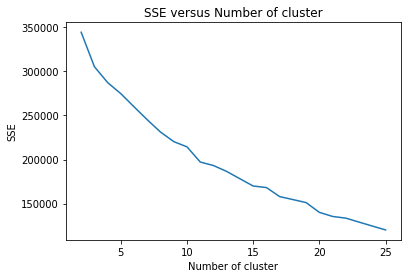

In [66]:
#Question 4

###4a 
# calculate sse with different clusters, and put the value into list(sse)
sse = []
K = range(2,26)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(foodscaled)
    sse.append(km.inertia_)
# plot the graph with number of clusters and list(sse)
# add labels and title as well.
plt.plot(K, sse)
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.title('SSE versus Number of cluster')
plt.show()    

Question 4b answer here
The elbow at the number of cluster from 5 to 10.
It is expected, beacuse the total food category is 23. Using 10 cluster can distinguish majority of categories. Therefore the sse is decreasing really fast at that interval.

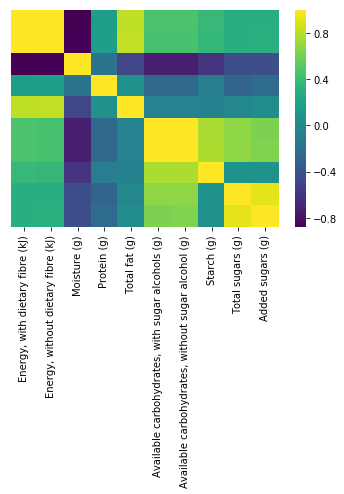

In [59]:
###Question 5

###5a
# select first 10 nutrients into a dataframe called food_10
food_10=pd.DataFrame(food.iloc[:,4:14])
# get the correlation value for food_10
corr = pd.DataFrame(food_10).corr(method = 'pearson')
# plot the heatmap of corr
sns.heatmap(corr,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()

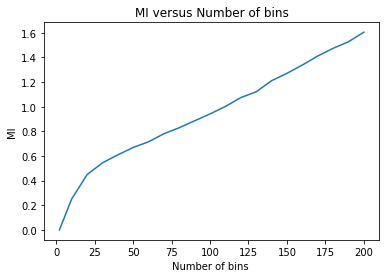

In [60]:
###5b code
# specific the x and y which are food['Protein (g)'] and food['Energy, with dietary fibre (kJ)']
x = food['Protein (g)']
y = food['Energy, with dietary fibre (kJ)']
# using a for loop to add number to bins which is a list
bins = [2]
i = 10
for i in range(10,210,10):
    bins.append(i)
# creat a list called num_mi to store MI value
# uisng funtion above to calculate MI value with different bins
num_mi=[]
for i in bins:
    num_mi.append(calc_MI(x,y,i))
#plot the diagram MI value versus number of bins 
plt.plot(bins,num_mi)
plt.xlabel('Number of bins ')
plt.ylabel('MI')
plt.title('MI versus Number of bins')
plt.show()



Question 5b comment here
The trend is increasing. The number of bins increasing really fast between 0 to 25. After that the slope tend to be stable until it reach to the end which is 200 of bins. When the number of bins becomes larger and larger, mutual infromation becomes larger as well which means two items have more correlation and similarity.

In [61]:
###5c code
# get the correlation value of dataframe df within method pearson
df_corr = pd.DataFrame(df).corr(method = 'pearson')
# creat a dictionary to store index name as key and value as dict value 
# and ignore the repetition.
dic_food={}
for x in range(0,52):
    for y in range(x+1,53):
        m = df_corr.iloc[:,x].name
        n = df_corr.iloc[:,y].name
        dic_food[m,n] = df_corr.iloc[x,y]
# convert dic_food to Series as df_food and using sort_values to 
# find the top 10 pairs
df_food = pd.Series(dic_food, index = dic_food.keys())
print(df_food.sort_values(ascending =False).head(10))
print('\n')

# using the same method as above, but using cal_MI to calculate the MI 
# value as dict value
dic_food_mi={}
for x in range(0,52):
    for y in range(x+1,53):
        m = df.iloc[:,x].name
        n = df.iloc[:,y].name
        dic_food_mi[m,n] = cal_MI(food[m],food[n],20)
        
df_food_mi = pd.Series(dic_food_mi, index = dic_food_mi.keys())
# print the result
print(df_food_mi.sort_values(ascending =False).head(10))



Alpha-tocopherol (mg)                             Vitamin E (mg)                                        0.999528
Energy, with dietary fibre (kJ)                   Energy, without dietary fibre (kJ)                    0.998608
Beta-carotene (µg)                                Provitamin A (b-carotene equivalents) (µg)            0.995961
Available carbohydrates, with sugar alcohols (g)  Available carbohydrates, without sugar alcohol (g)    0.995466
Added sugars (g)                                  Free sugars (g)                                       0.988894
Total Folates  (µg)                               Dietary folate equivalents  (µg)                      0.985763
Total polyunsaturated fat (g)                     Linoleic acid (g)                                     0.973640
Folic acid  (µg)                                  Dietary folate equivalents  (µg)                      0.958112
Preformed vitamin A (retinol) (µg)                Vitamin A retinol equivalents (µg)            

Question 5c comment here
As can be seen,eneergy with and without fire and added sugar and free sugar in the top 10 in both pearson correlation and mutual information. Both pearson correlation and mutual information are a measure of relationship between features. However, mutual information is a distance between two probability distributions. Correlation is a linear distance between two random variables. Pearson correlation is only able to takes into account linear relationships but the mutual information can also handle non-linear relationships.


***
Q6.a: Train Test Split Results
X_train matrix: (4592, 53)
y_train labels: (4592,)
X_test matrix: (1148, 53)
y_test labels: (1148,)
***


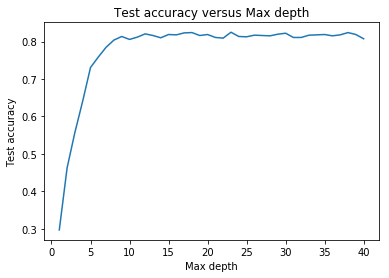

In [108]:
##Question 6


###6a
# specific the X and Y value 
X = foodscaled.drop(['Food category'],axis =1)
Y = foodscaled['Food category']
# set up training and testing size to 0.8 and 0.2
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2, random_state=100)
# print the results 
print("***")
print("Q6.a: Train Test Split Results")
print("X_train matrix:",X_train.shape)
print("y_train labels:",y_train.shape)
print("X_test matrix:",X_test.shape)
print("y_test labels:",y_test.shape)
print("***")


###6b
# creat a lst_dec to store values with different max_depth.
lst_dec=[]
splits = range(1,41)
for i in splits:
    dt = DecisionTreeClassifier(criterion="entropy", max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    lst_dec.append(accuracy_score(y_test, y_pred))
# plot the graph with different max_depth and values with different max_depth.
plt.plot(splits,lst_dec)
plt.xlabel("Max depth")
plt.ylabel("Test accuracy")
plt.title('Test accuracy versus Max depth')
plt.show()
    

Question 6c comment here
Max depth is the maximum depth of the tree which is the length of longest
path from the tree root to a leaf.
Lower max depth will make the model fast but decrease accuracy, vice versa. Therefore, the diagram gets high accuracy when the max depth gets larger. As can be seen, when the max depth value reachs 8 the accurary is not increasing as fast as before, because 8 seens like the suitable value of max depth.

In [63]:
#Question 7

###7a
# calculate knn value with number of neighbors equal to 1.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
y_pred_train=knn.predict(X_train)
# print the accuracy
print('***')
print('Q7.a: Food category prediction using k-NN (k=1)')
print('Train accuracy:',round(accuracy_score(y_train, y_pred_train)*100,1),'%')
print('Test accuracy:',round(accuracy_score(y_test, y_pred)*100,1),'%')
print('***')
print('\n')

##7b
# calculate knn value with number of neighbors equal to 3.
knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train, y_train)
y_pred2=knn2.predict(X_test)
y_pred_train2=knn2.predict(X_train)
# print the accuracy
print('***')
print('Q7.b: Food category prediction using k-NN (k=3)')
print('Train accuracy:',round(accuracy_score(y_train, y_pred_train2)*100,1),'%')
print('Test accuracy:',round(accuracy_score(y_test, y_pred2)*100,1),'%')
print('***')




***
Q7.a: Food category prediction using k-NN (k=1)
Train accuracy: 100.0 %
Test accuracy: 89.5 %
***


***
Q7.b: Food category prediction using k-NN (k=3)
Train accuracy: 93.3 %
Test accuracy: 88.0 %
***


Question 7c comment here

Both a and b part are K-NN prediction method.
They both used euclidean distance as distance metric.

The difference between part a and b is they are used different k (number
of neighbors). Generally, larger values of k reduces effect of noise.
A small K value provides the most flexible fit, which will have low bias but high variance. However, a higher K value will have smoother decision boundaries which means lower variance but increased bias. Therefore, increasing the value of K will reduce accuracy but have more concerned about outlier. As can be seen from part a and b result, when k value increased, accuracy decreased.


Question 7d comment here
In the Q1, we have processed all data in foodscaled which have not been
spilt to training data and testing data. Testing data was looked at when 
doing feature selection. The model that was trained using the results from the feature seletion. In order to solve this situation, we need to 
split the data to training and testing set before doing standardisation.



In [137]:
#Question 8 code
foodscaled=foodscaled.astype(float)
# Select out the new feature and put into dic_newfood.
dic_newfood={}
for i in range(0,52):
    for j in range(i+1,53):
        m = df.iloc[:,i].name
        n = df.iloc[:,j].name
        dic_newfood[m,n]=foodscaled[i]*foodscaled[j]
#change dic_newfood to dataframe
#select M and N value 
new_food= pd.DataFrame(dic_newfood)
KM = KMeans(n_clusters=20)
KM = km.fit(foodscaled)
KM.inertia_
new_food['Food category']= foodscaled['Food category']
M = new_food.drop(['Food category'],axis =1)
N = new_food['Food category']
# seperate training set and testing set
M_train, M_test, N_train, N_test = train_test_split(M,N, train_size=0.8,test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(M_train, N_train)
N_pred=knn.predict(M_test)
N_pred_train=knn.predict(M_train)
acc_train = accuracy_score(y_train, y_pred_train2)*100,1
acc_test = accuracy_score(y_test, y_pred2)*100,1


ValueError: shapes (1,53) and (1,53) not aligned: 53 (dim 1) != 1 (dim 0)

Question 8 discussion here
feature selection+generation can deliver an accuracy boost. First, calculate each pair and store data into dic_newfood. After that convert dictionary to dataframe. Seperate the data to 
training set and testing set, Calculate the knn value with number of neighbors equal to 3 and cluster number equal to 20.